# Units and Quantities

## Objectives

- Use units
- Create functions that accept quantities as arguments
- Create new units

## Basics

How do we define a Quantity and which parts does it have?

In [1]:
import astropy.units as u

In [11]:
length = 26.2 * u.meter
print(length)
type(length)

26.2 m


astropy.units.quantity.Quantity

In [9]:
type(length.value)

float

In [10]:
length.info

dtype = float64
unit = m
class = Quantity
n_bad = 0

In [22]:
distance_start = 10*u.mm
distance_end = 23 *u.km

length = distance_end-distance_start
print(length)

22.99999 km


Quantities can be converted to other units systems or factors by using `to()`

In [33]:
print(length.to(u.m))

22999.99 m


We can do arithmetic operations when the quantities have the compatible units:

In [39]:
time = 15 * u.minute
speed = length / time
print(speed)
print(speed.to(u.m/u.s))
print(speed.decompose())
print(speed.si)

1.5333326666666667 km / min
25.555544444444447 m / s
25.555544444444447 m / s
25.555544444444447 m / s


Quantities can also be combined, for example to measure speed


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Unit conversions</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the speed in imperial units (miles/hour) using:
    <code>from astropy.units import imperial</code></li>
<li>Calculate whether a pint is more than half litre.
    <em>You can compare quantities as comparing variables.</em>
    Something strange? Check what deffinition of <a href="https://en.wikipedia.org/wiki/Pint">pint</a> astropy is using.</li>
<li>Does units work with areas? calculate the area of a rectangle of 3 km of side and 5 meter of width. Show them in $m^2$ and convert them to yards$^2$</li>
</ol>

</div>

</section>


In [73]:
from astropy.units import imperial

print(speed)
print(speed.to(imperial.mile/u.hour))

halfLiter = u.liter/2
pint = 1*imperial.pint

print(imperial.pint)

print(pint > halfLiter)
print(pint.to(u.ml))

print(halfLiter)

side = 3*u.km 
width = 5*u.m
print((side*width).decompose())
print((side.to(u.m).to(imperial.yard)*width.to(imperial.yard)))

1.5333326666666667 km / min
57.16612483098704 mi / h
pint
False
473.176473641504 ml
0.5 l
15000.0 m2
17939.850694516197 yd2


## Composed units

Many units are compositions of others, for example, one could create new combinationes for ease of use:

In [76]:
cms = u.cm/u.s
print(cms)
print(speed.to(cms))
speed.to(cms)

cm / s
2555.5544444444445 cm / s


<Quantity 2555.55444444 cm / s>

and others are already a composition:

In [79]:
(u.joule).compose()

[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

In [93]:
nounits = 20*u.cm/(1*u.m)
nounits.decompose()

m = 10*u.m
print(m)

10.0 m


Sometime we get *no units* quantitites

What happen if we add a number to this?

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers, for example converting between wavelength and frequency.

In [94]:
(656.281 * u.nm).to(u.Hz)

UnitConversionError: 'nm' (length) and 'Hz' (frequency) are not convertible

In [96]:
(656.281 * u.nm).to(u.Hz, equivalencies = u.spectral())

<Quantity 4.56805024e+14 Hz>

Other built-in equivalencies are: 
 - `parallax()`
 - Doppler (`dopplr_radio`, `doppler_optical`, `doppler_relativistic`)
 - spectral flux density
 - brigthness temperature
 - temperature energy
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

In [99]:
u.Hz.find_equivalent_units()

  Primary name | Unit definition | Aliases     
[
  Bq           | 1 / s           | becquerel    ,
  Ci           | 3.7e+10 / s     | curie        ,
  Hz           | 1 / s           | Hertz, hertz ,
]

## Printing the quantities

In [108]:
print("{0.value:0.03f}{0.unit:FITS}".format(speed.si))
print("{0.value:0.03f}{0.unit:latex_inline}".format(speed))

25.556m s-1
1.533$\mathrm{km\,min^{-1}}$


In [115]:
print(f"{speed.value} {speed.unit:FITS}")

1.5333326666666667 km min-1


## Arrays

Quantities can also be applied to arrays

In [117]:
import numpy as np
my_arr = np.array([1, 4, 5, 213])

length = 44*u.m
time = u.Quantity(23, u.s)

speed = length/time
print(speed)

1.9130434782608696 m / s


In [125]:
length_list = [1,2,3]*u.m
print(length_list)

time_array = np.array([1,2,3])*u.s

print(length_list/time_array)
print(time_array[0])

[1. 2. 3.] m
[1. 1. 1.] m / s
1.0 s


In [141]:
angle = u.Quantity(np.arange(10, 180, 2.1), u.deg)
print(angle[[0,-1]])
print(np.sin(angle[[0, -1]]))

[ 10. 178.] deg
[0.17364818 0.0348995 ]
[ 10.   12.1  14.2  16.3  18.4  20.5  22.6  24.7  26.8  28.9  31.   33.1
  35.2  37.3  39.4  41.5  43.6  45.7  47.8  49.9  52.   54.1  56.2  58.3
  60.4  62.5  64.6  66.7  68.8  70.9  73.   75.1  77.2  79.3  81.4  83.5
  85.6  87.7  89.8  91.9  94.   96.1  98.2 100.3 102.4 104.5 106.6 108.7
 110.8 112.9 115.  117.1 119.2 121.3 123.4 125.5 127.6 129.7 131.8 133.9
 136.  138.1 140.2 142.3 144.4 146.5 148.6 150.7 152.8 154.9 157.  159.1
 161.2 163.3 165.4 167.5 169.6 171.7 173.8 175.9 178. ] deg


## Plotting quantities

To work nicely with matplotlib we need to do as follows:

In [143]:
from astropy.visualization import quantity_support
quantity_support()

%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


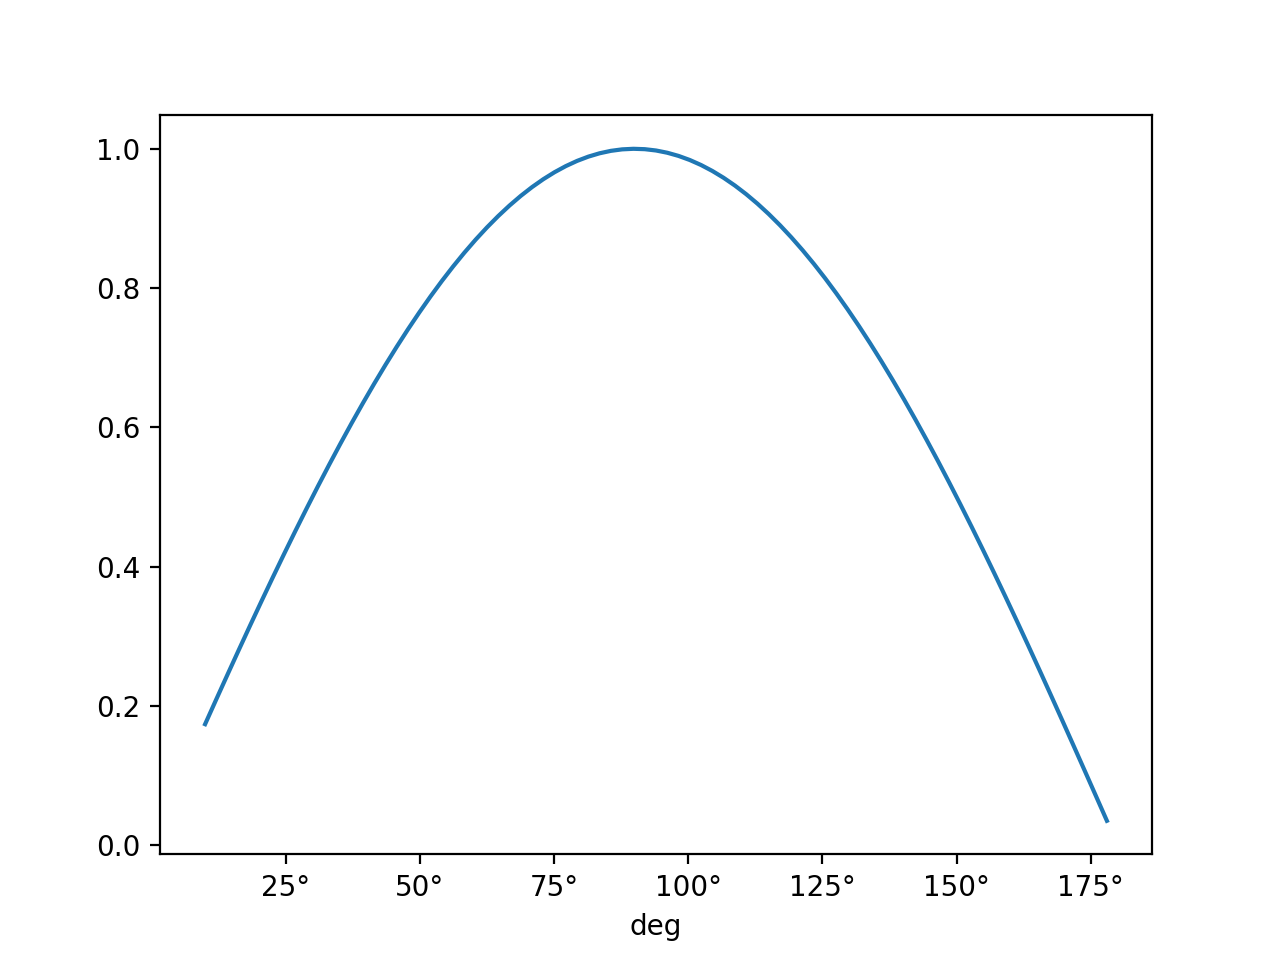

In [147]:
angle = angle.to(u.deg)
plt.plot(angle, np.sin(angle))

## Creating functions with quantities as units

We want to have functions that contain the information of the untis, and with them we can be sure that we will be always have the *right* result.

In [186]:
#@u.quantity_input(mass=u.kg, speed=u.m/u.s)
#def kinetic(mass, speed):
#    return (mass*speed**2/2.).to(u.joule)

def kinetic(mass: u.kg, speed: u.m/u.s):
    return (mass*speed**2/2.).to(u.joule)

In [187]:
kinetic(10,3)

AttributeError: 'float' object has no attribute 'to'

In [164]:
print(1*cms)
kinetic(10*u.kg, 3*cms)

1.0 cm / s


<Quantity 0.0045 J>


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Using `quantity_input`</h2>
</div>


<div class="panel-body">

<ol>
<li>Create a function that calculates potential energy where $g$ defaults to Earth value, but could be used for different planets. Test it for any of the $g$ values for any other <a href="http://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g&quot;">planets</a>.</li>
</ol>

</div>

</section>


In [238]:
import astropy.units as u

@u.quantity_input()
def pot_energy(mass: u.kg, height: u.m, g: u.m/(u.s**2)=9.81*u.m/(u.s**2)):
    return (mass*height*g).to(u.joule)

@u.quantity_input(mass=u.kg, height=u.m, g=u.m/(u.s**2))
def potential_energy(mass, height, g=9.81):
    return (mass*height*g).to(u.joule)

@u.quantity_input()
def p_energy(mass: u.kg, height: u.m, g: u.m/(u.s**2)=9.81*u.m/(u.s**2)) -> u.joule:
    return (mass*height*g)

In [239]:
#print(pot_energy(1,1,9.81))
print(pot_energy(1*u.kg,1*u.m))
print(pot_energy(1*u.kg,1*u.m, 10*u.m/(u.s**2)))
print(potential_energy(1*u.kg,1*u.m, 10*u.m/(u.s**2)))
print(p_energy(1*u.kg,1*u.m))

9.81 J
10.0 J
10.0 J
9.81 J


## Create your own units

Some times we want to create our own units:


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Area with units</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the area calculated before <code>rectangle_area</code> in <a href="https://en.wikipedia.org/wiki/Hectare">hectares</a> (1 hectare = 100 ares; 1 are = 100 $m^2$).</li>
</ol>

</div>

</section>
